In [1]:
import iris
import numpy as np
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf
from cartopy import crs

hv.notebook_extension()

/accounts/ekarakoy/anaconda3/lib/python3.5/site-packages/holoviews/core/util.py:27: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  datetime_types = datetime_types + (pd.tslib.Timestamp,)
/accounts/ekarakoy/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The Vega20 colormap was deprecated in version 2.0. Use tab20 instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/accounts/ekarakoy/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The Vega20b colormap was deprecated in version 2.0. Use tab20b instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/accounts/ekarakoy/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The Vega10 colormap was deprecated in version 2.0. Use tab10 instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/accounts/ekarako

In [30]:
mycmap = cm.cm.haline
mycmap.set_bad('k', alpha=1)
mycmap.set_under('k', alpha=0.5)

In [3]:
fp='/accounts/ekarakoy/disk02/UNCERTAINTIES/Monte-Carlo/DATA/AncillaryMC/Synthesis/8D/S20031932003200.L3m_8D_443.nc'

In [5]:
iris.FUTURE.netcdf_promote=True
iris_ensemble = iris.load_cube(fp)
print (iris_ensemble.summary())

Uncertainty in remote sensing reflectance at 443 nm / (sr^-1) (-- : 6; latitude: 1578; longitude: 4318)
     Dimension coordinates:
          latitude                                                -            x                -
          longitude                                               -            -                x
     Auxiliary coordinates:
          experiment                                              x            -                -
     Attributes:
          display_max: 0.01
          display_min: 0.0
          display_scale: linear
          valid_max: 25000
          valid_min: -30000


/accounts/ekarakoy/anaconda3/lib/python3.5/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1952: UserWarning: Failed to create 'experiment' dimension coordinate: The points array must be numeric.
Gracefully creating 'experiment' auxiliary coordinate instead.
  error=e_msg))


In [8]:
iris_ensemble

<iris 'Cube' of Uncertainty in remote sensing reflectance at 443 nm / (sr^-1) (-- : 6; latitude: 1578; longitude: 4318)>

In [6]:
vdims=['rrs_unc']
kdims=['lat','lon','experiment']

In [7]:
iris_dataset = gv.Dataset(iris_ensemble, kdims=kdims, vdims=vdims)

ValueError: None of the available storage backends were able to support the supplied data format.

In [4]:
def SubSample(path,latSlice=2, lonSlice=5):
    """slice the dataset for faster rendering"""
    with xr.open_dataset(path) as rawEnsemble:
        subSample = rawEnsemble.data_vars['rrs_unc'][:,::latSlice,::lonSlice].copy()
        dsSubSample = subSample.to_dataset()
    return dsSubSample

In [5]:
ds = SubSample(fp)

In [7]:
lons = ds.variables['lon'][:]

In [13]:
lats = ds.variables['lat'][:]
o3 = ds.variables['experiment'][0]

In [14]:
lons.shape

(864,)

In [18]:
rrs_unc = ds.variables['rrs_unc'][:]

In [53]:
import numpy as np
import holoviews as hv
hv.notebook_extension('matplotlib')
fractal = hv.Image();

/accounts/ekarakoy/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The Vega10_r colormap was deprecated in version 2.0. Use tab10_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/accounts/ekarakoy/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The Vega20c colormap was deprecated in version 2.0. Use tab20c instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/accounts/ekarakoy/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The Vega20b colormap was deprecated in version 2.0. Use tab20b instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/accounts/ekarakoy/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The Vega20_r colormap was deprecated in version 2.0. Use tab20_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/accounts/ekarakoy/anaconda3/lib/python3

FileNotFoundError: [Errno 2] No such file or directory: 'mandelbrot.npy'

In [33]:

rrs_unc[0].min(), rrs_unc[0].max()

(<xarray.Variable ()>
 array(8.712959242984653e-10), <xarray.Variable ()>
 array(0.001148000868397503))

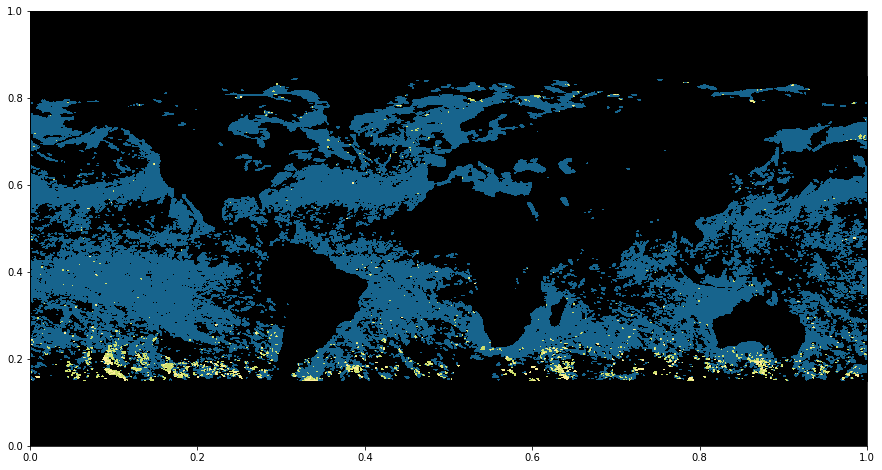

In [52]:
f=pl.figure(figsize=(15,8))
ax1 = f.add_subplot(111, facecolor='k')
ax2 = f.add_subplot(111, facecolor='k', projection=ccrs.PlateCarree())
ax2.background_patch.set_fill(False)
pl.contourf(lons, lats, rrs_unc[0], 20, transform=ccrs.PlateCarree(), 
            cmap=mycmap,vmin=1e-6, vmax=1e-4)
ax.coastlines(color='white', linewidth=5)
ax.add_feature(cf.LAND, facecolot='gray');